# CoreNLP

## **Introduction**

**Stanford's CoreNLP is an integrated Natural Language Processing (NLP) toolkit to analyze text**. CoreNLP allows the extraction of all kinds of text properties like lemmatization, tokenization, part-of-speech tagging, named-entity recognition, coreference resolution system, sentiment analysis, dependency parsing, etc. that too in *just a few lines of code*. In addition to this, it also has support for four human languages other than English: Arabic, Chinese, French, German, and Spanish.

**CoreNLP is implemented in Java and requires java to be installed on your device**. They know Java is not everybody's cup of tea, so an inbuilt CoreNLP server is shipped (needs to be set up locally) and can be accessed through an API.

In this notebook, setting up of Stanford CoreNLP server, and access using python will be demonstrated. 

## **Download Stanford CoreNLP**

To download Stanford CoreNLP go to https://stanfordnlp.github.io/CoreNLP and download the latest version. The latest version at the time of writing is CoreNLP 3.9.2(2018-10-05). 

Alternatively, Stanford CoreNLP source is available on GitHub as well. For more information on download [click here.](https://stanfordnlp.github.io/CoreNLP/download.html)

Once the download is completed, unzip the zip file, open the folder that results and it is ready to use.

The zip file contains the following: 
    1. the CoreNLP code jar 
    2. the CoreNLP models jar (required in your classpath for most tasks)
    3. the libraries required to run CoreNLP 
    4. documentation/source code for the project

### **Install Java8**

Stanford CoreNLP is written in Java and recent releases require *Java 1.8 and above*. Java needs to be installed in order to run CoreNLP.

##  Running Stanford CoreNLP Server

Stanford CoreNLP ships with a **built-in server**, which requires only the CoreNLP dependencies. <br>
To start the server, go to the path of the unzipped Stanford CoreNLP server and simply run:

The parameter -mx4g specifies the maximum amount of memory CoreNLP is allowed to use. In our case, it's four gigabytes. The parameter -timeout 15000 specifies the timeout in milliseconds.

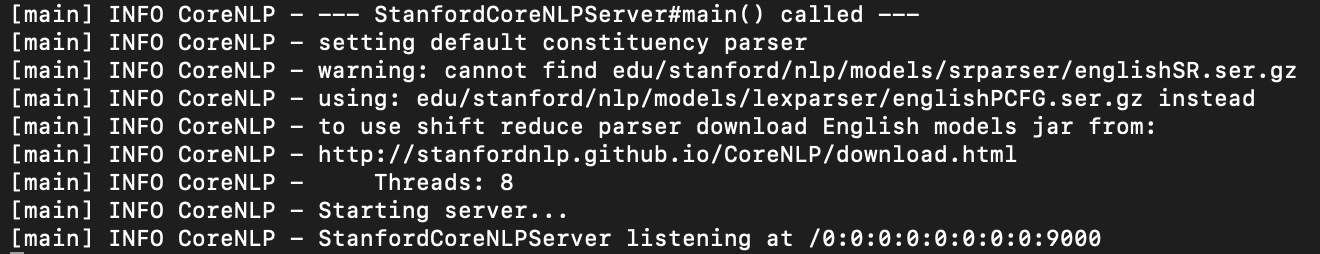

The server is running at port 9000.

Assuming the default configuration, we should be able to reach page **http://localhost:9000** on our local machine and see an interface like this

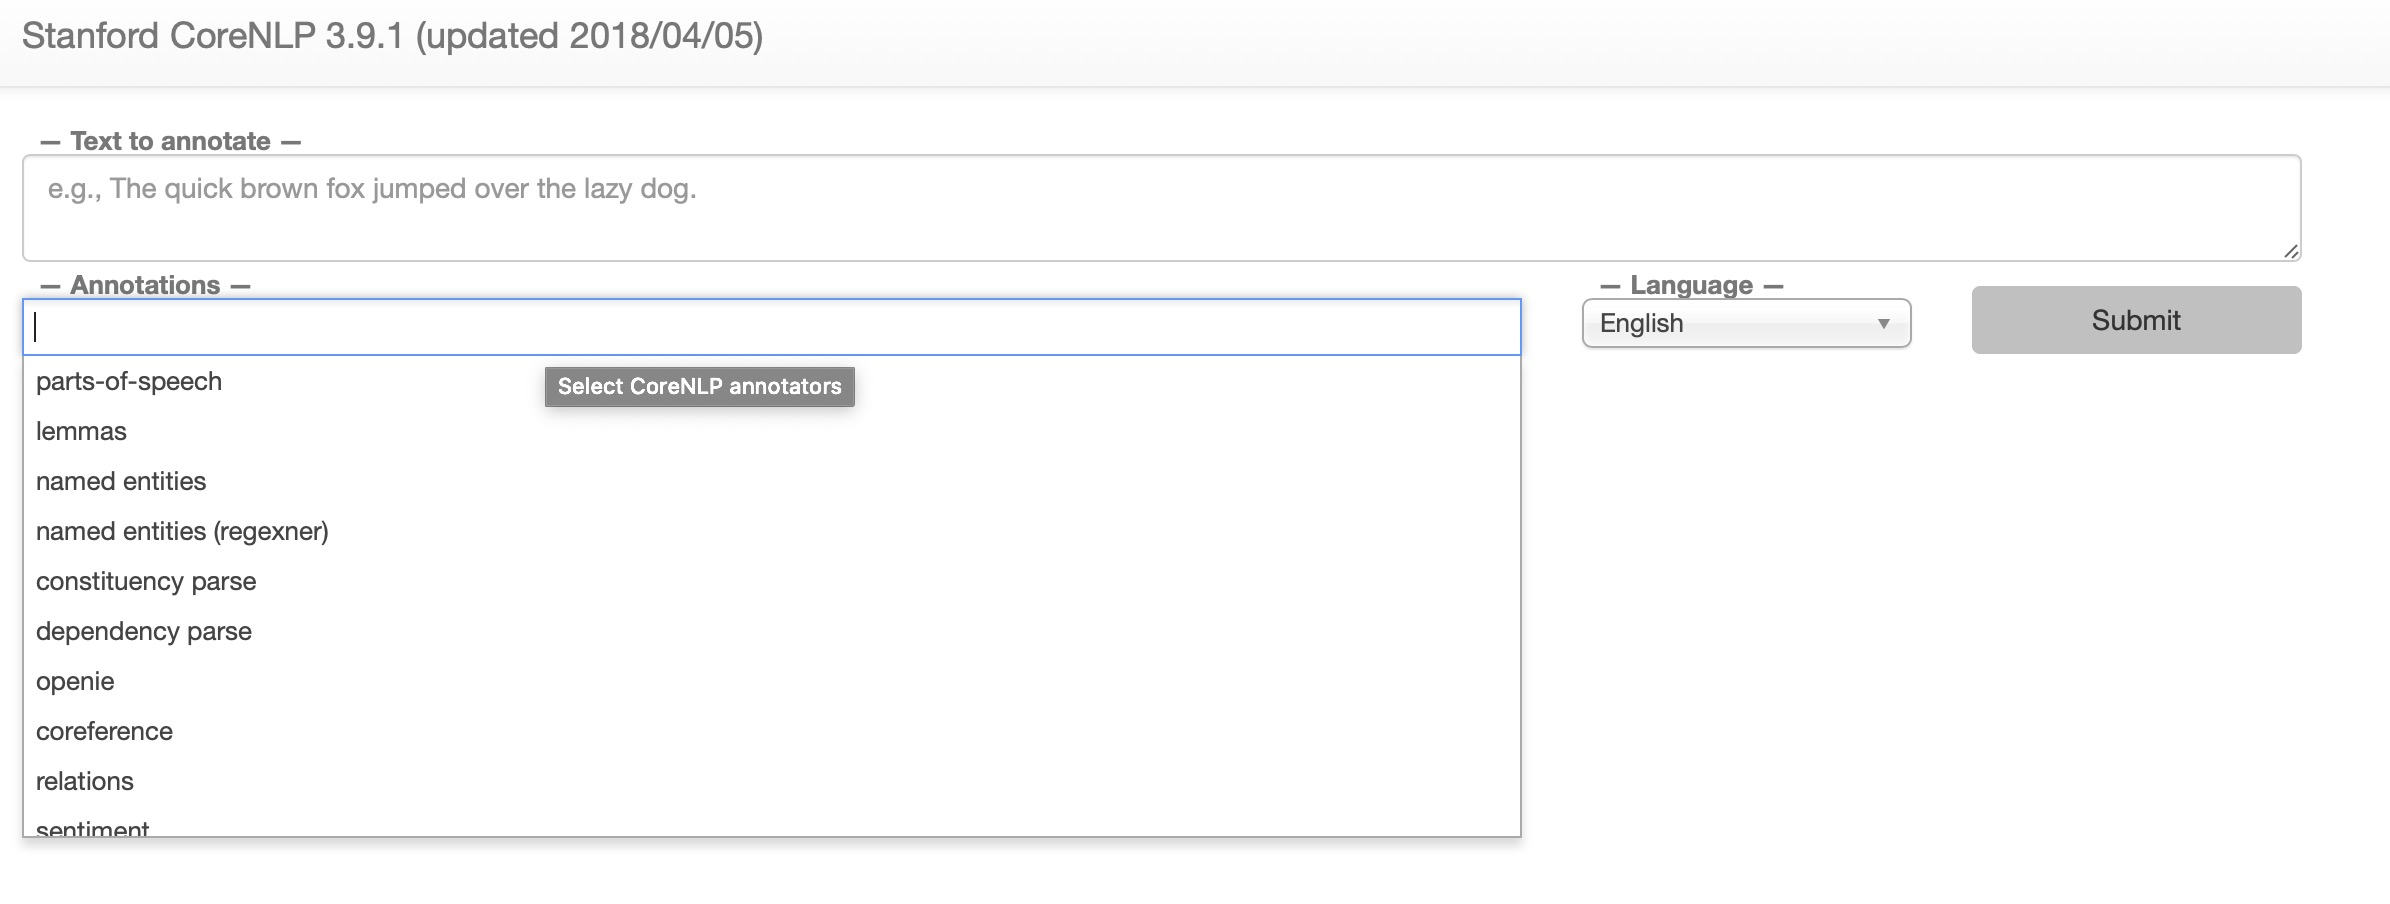

Small texts can be submitted to CoreNLP engine through the user interface. The CoreNLP server runs the NLP analysis and graphically shows the results as shown in the following images.

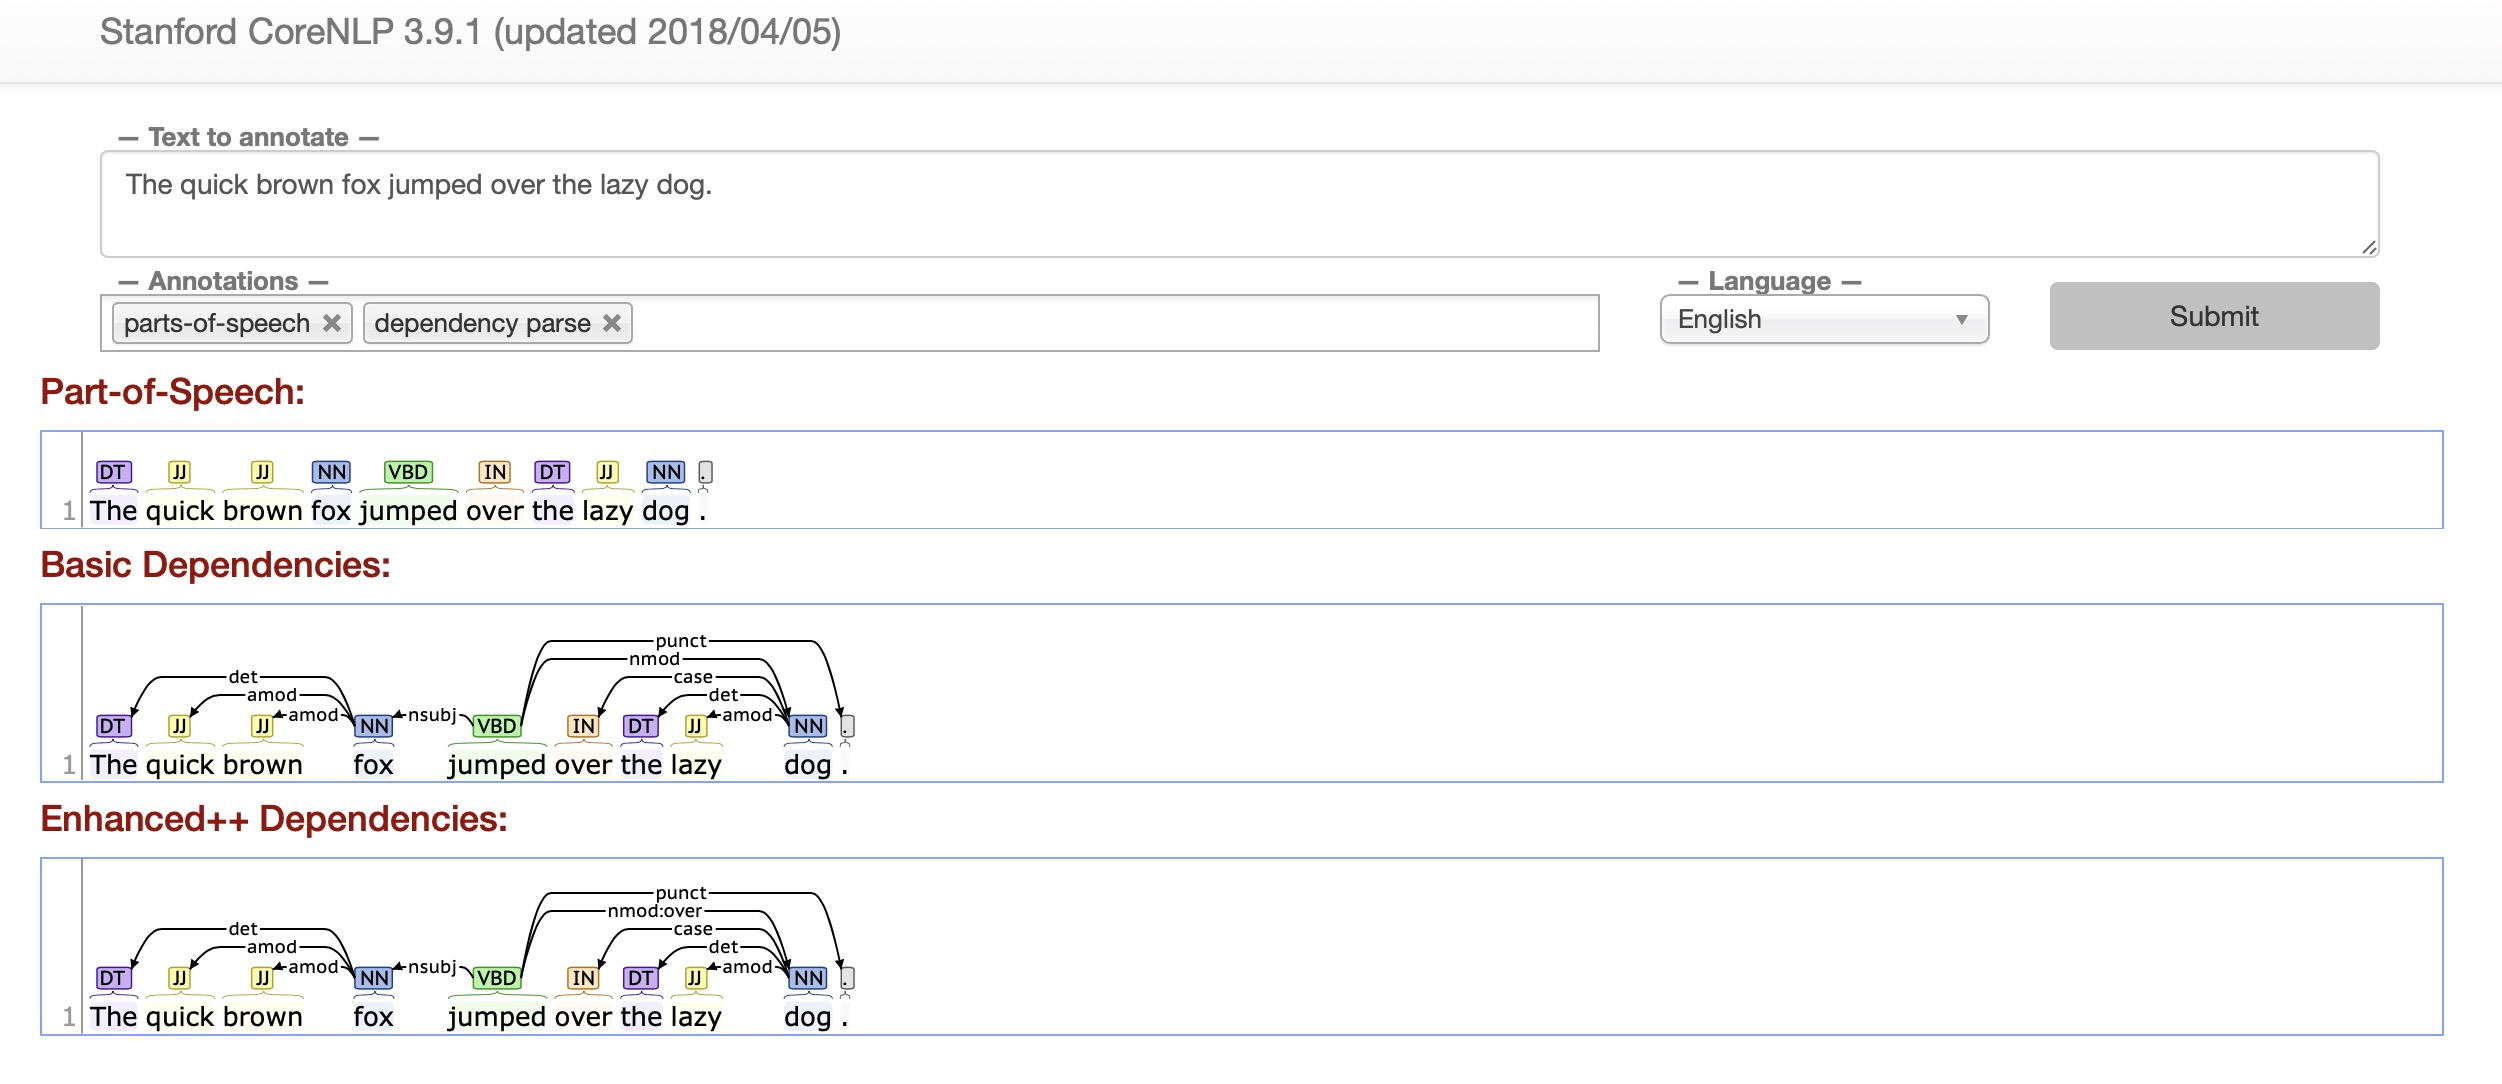

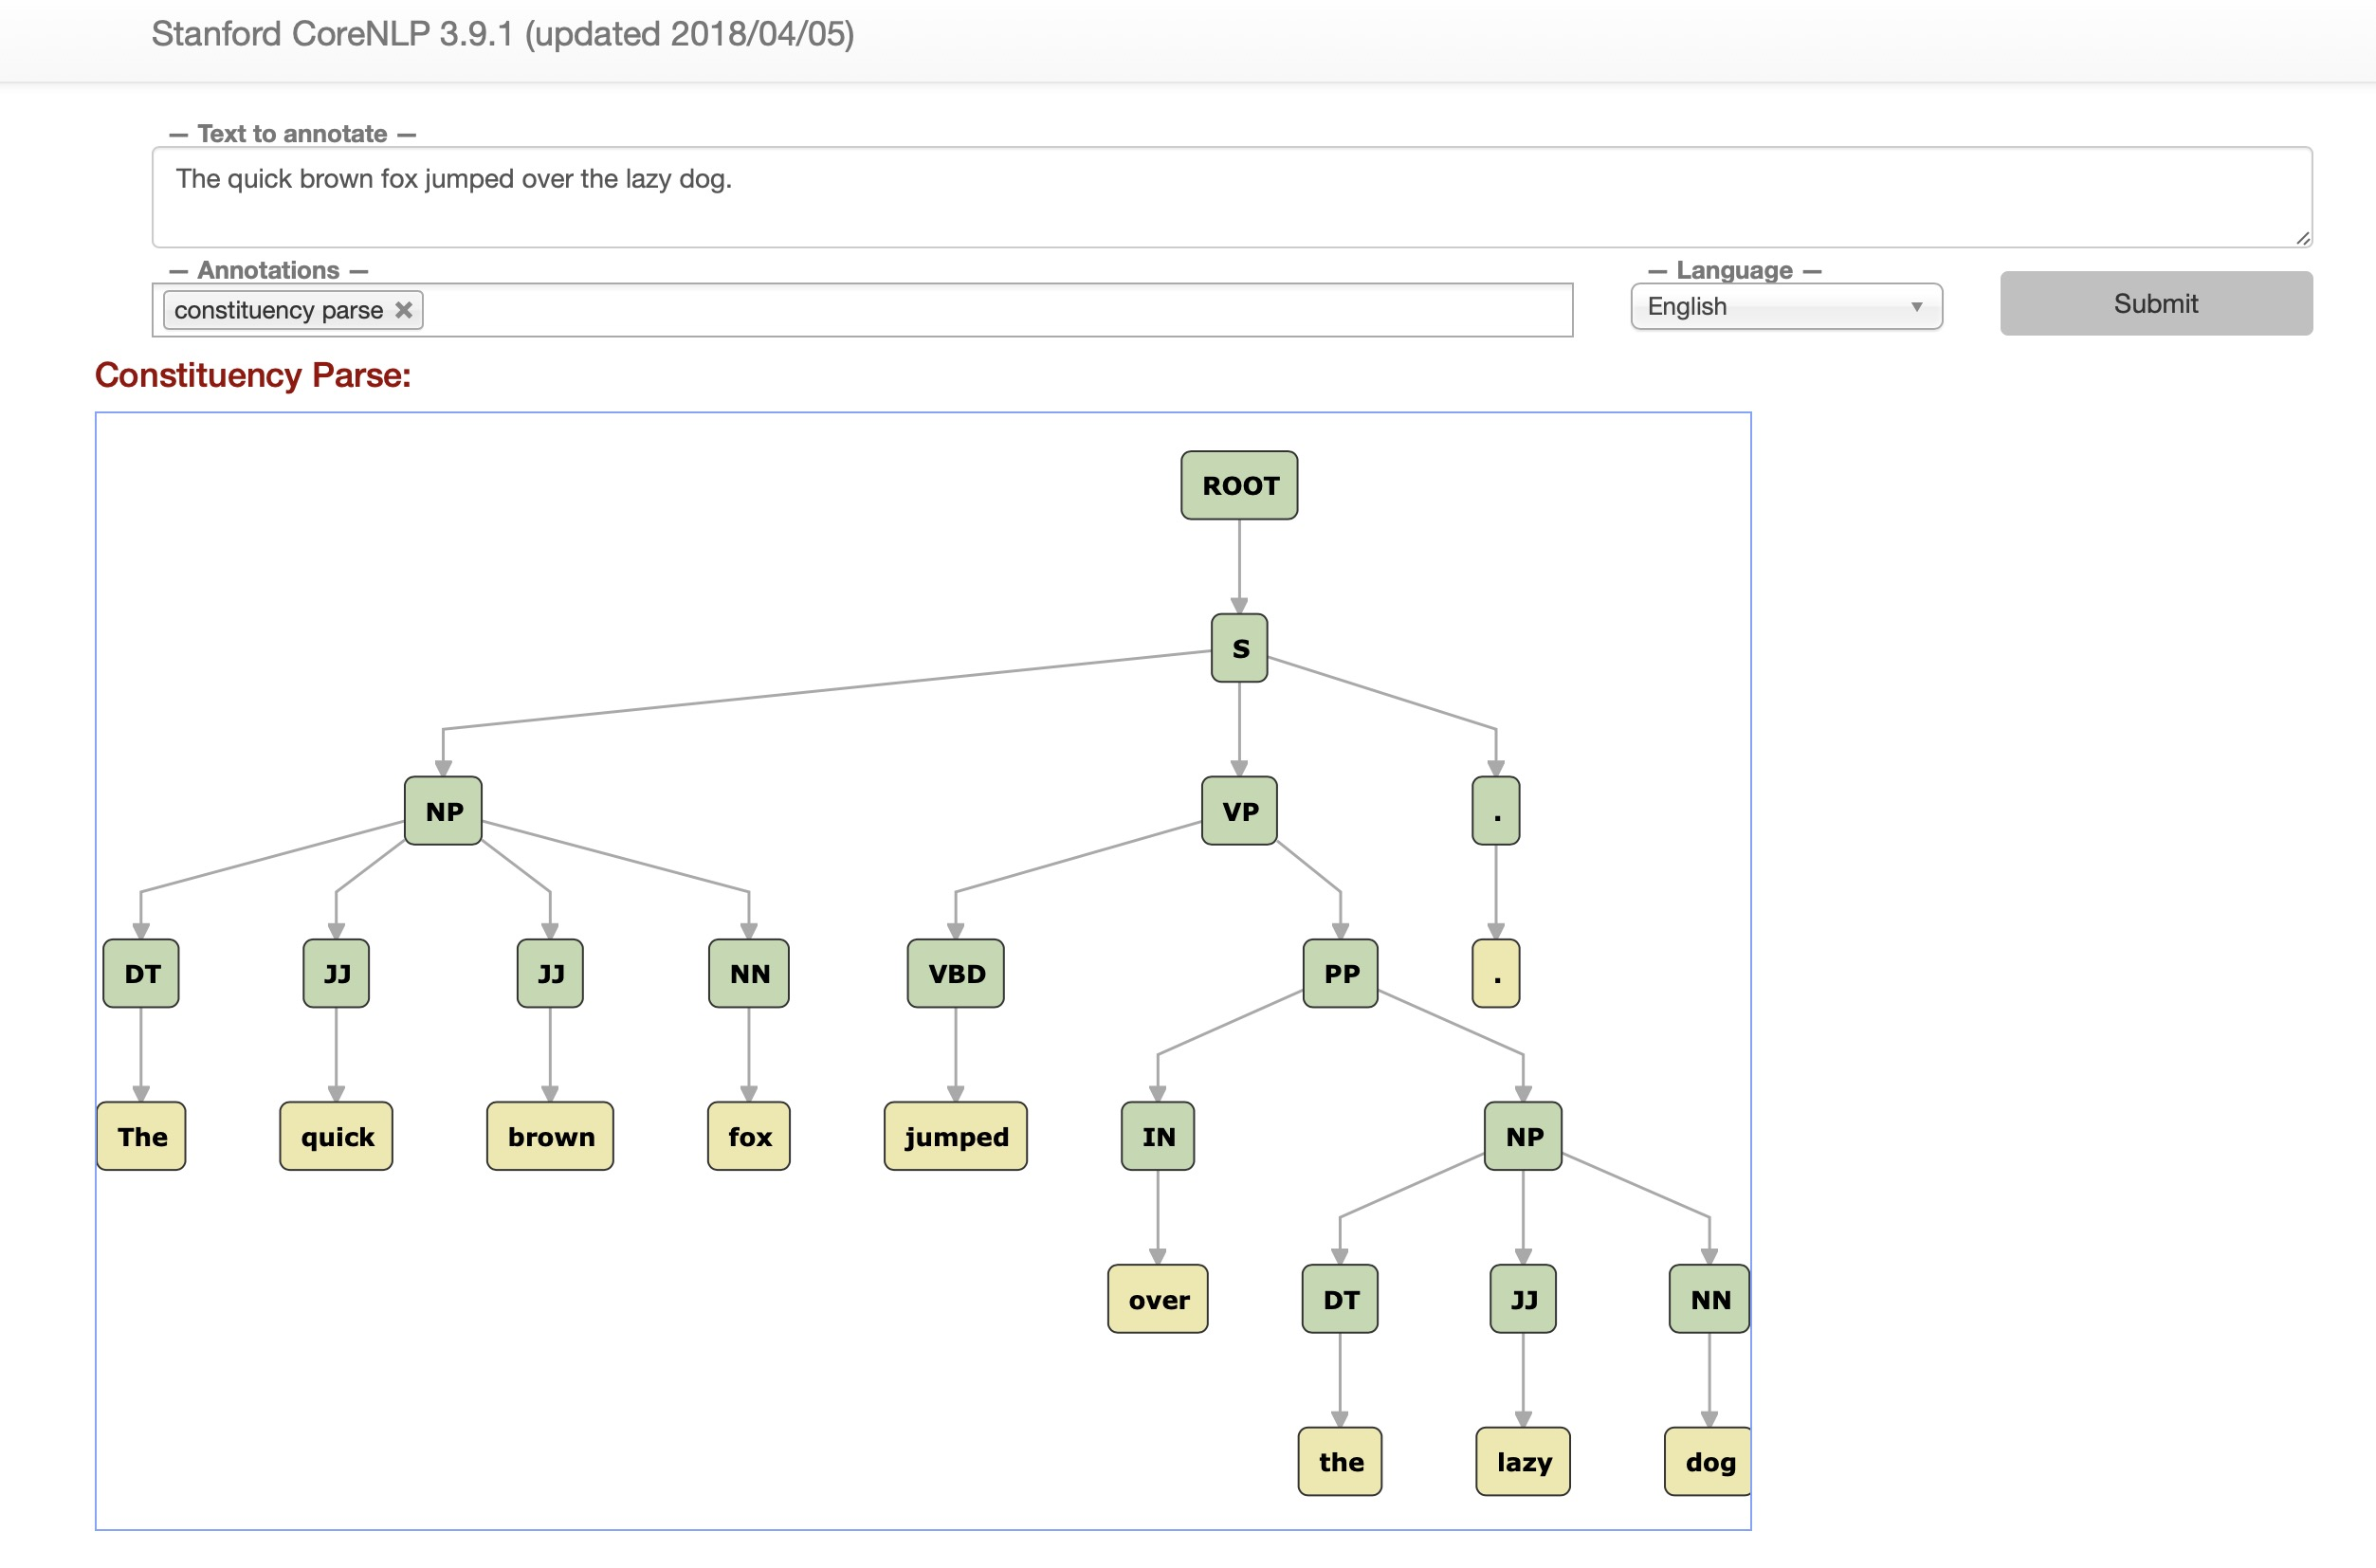

## Text Analysis using Python API

Stanford CoreNLP server can be accessed using many other programming languages other than Java as there are **[third party APIs](https://stanfordnlp.github.io/CoreNLP/other-languages.html)** implemented over most commonly used programming languages such as C#, Go, Perl, PHP, Python, Ruby, Scala, etc.

The last thing required to analyze text is the Python API.

In [ ]:
pip install pycorenlp

We will be using **pycorenlp**, a Python wrapper for Stanford CoreNLP and uses the new CoreNLP v3.6+ server.

Lets import pycorenlp and initialize CoreNLP. 

To establish the connection to the server, address of CoreNlP server needs to be passed to StanfordCoreNLP class of the pycorenlp module. The object returned can be used to perform NLP tasks.

In [1]:
from pycorenlp import StanfordCoreNLP

core_nlp = StanfordCoreNLP('http://localhost:9000')

We will cover a few use cases of StanfordCoreNLP library for common NLP tasks

## Lemmatization

Lemmatization entails the *removal of word affixes to get the base form* of a word known as 'root word' or 'lemma'. Lemma is always a lexicographically correct word and will always be present in the dictionary. 

In [2]:
sample_text = "London is the capital and most populous city of England and the United Kingdom. \
Standing on the River Thames in the south east of the island of Great Britain, \
London has been a major settlement for two millennia. \
It was founded by the Romans, who named it Londinium. "

Annotator will split the document into sentences and further splits the sentences into words or tokens. The words are then annotated with POS and named entity recognition tags.

The only function used to perform NLP using py-coreNLP is core_nlp.annotate(). Tyes of analysis that needs to be done can be specified using annotators.

In [5]:
annoted_text = core_nlp.annotate(sample_text,
    properties={
        'annotators': 'pos,ner',
        'outputFormat': 'json',
        'timeout': 1000,
    })

In [11]:
import json

json_output = json.dumps(annoted_text)
print(json.loads(json_output))


{'sentences': [{'index': 0, 'parse': '(ROOT\n  (S\n    (NP (NNP London))\n    (VP (VBZ is)\n      (NP\n        (NP (DT the) (NN capital))\n        (CC and)\n        (NP\n          (NP\n            (ADJP (RBS most) (JJ populous))\n            (NN city))\n          (PP (IN of)\n            (NP\n              (NP (NNP England))\n              (CC and)\n              (NP (DT the) (NNP United) (NNP Kingdom)))))))\n    (. .)))', 'basicDependencies': [{'dep': 'ROOT', 'governor': 0, 'governorGloss': 'ROOT', 'dependent': 4, 'dependentGloss': 'capital'}, {'dep': 'nsubj', 'governor': 4, 'governorGloss': 'capital', 'dependent': 1, 'dependentGloss': 'London'}, {'dep': 'cop', 'governor': 4, 'governorGloss': 'capital', 'dependent': 2, 'dependentGloss': 'is'}, {'dep': 'det', 'governor': 4, 'governorGloss': 'capital', 'dependent': 3, 'dependentGloss': 'the'}, {'dep': 'cc', 'governor': 4, 'governorGloss': 'capital', 'dependent': 5, 'dependentGloss': 'and'}, {'dep': 'advmod', 'governor': 7, 'governorGlos

In our case,  we have specified in annotators to perform part-of-speech tagging and named-entity recognition. *Results can be easily indexed from JSON format for further analysis.*

In [6]:
# find lemmas for tokens in sample text
for sentence in annoted_text["sentences"]:
    for word in sentence["tokens"]:
        print(word["word"] + " => " + word["lemma"])

London => London
is => be
the => the
capital => capital
and => and
most => most
populous => populous
city => city
of => of
England => England
and => and
the => the
United => United
Kingdom => Kingdom
. => .
Standing => stand
on => on
the => the
River => River
Thames => Thames
in => in
the => the
south => south
east => east
of => of
the => the
island => island
of => of
Great => Great
Britain => Britain
, => ,
London => London
has => have
been => be
a => a
major => major
settlement => settlement
for => for
two => two
millennia => millennium
. => .
It => it
was => be
founded => found
by => by
the => the
Romans => Romans
, => ,
who => who
named => name
it => it
Londinium => londinium
. => .


### Observation

We can observe that most of the words in our sample text are already in their base forms. The semantics of the words are not affected, yet our text is still standardized.

## Parts of Speech (POS) Tagging

The process of classifying and *assigning specific lexical categories to each word, based on their context and role*. POS tags are generally used to perform specific analyses, such as looking for prominent nouns, grammar analysis and, word sense disambiguation.
N(oun) <br>
V(erb) <br>
Adj(ective) <br>
Adv(erb) <br>
Pronouns <br>
IN - Prepositions <br>
UH - Intejections <br>
CC - Conjunctions <br>
DT - Determiners etc <br>

Each POS tag can be further broken down into singular nouns (NN), singular proper nouns (NNP), and plural nouns (NNS).

In [7]:
# POS tags for words in our sample text
for sentence in annoted_text["sentences"]:
    for word in sentence["tokens"]:
        print (word["word"] + "=>" + word["pos"])

London=>NNP
is=>VBZ
the=>DT
capital=>NN
and=>CC
most=>RBS
populous=>JJ
city=>NN
of=>IN
England=>NNP
and=>CC
the=>DT
United=>NNP
Kingdom=>NNP
.=>.
Standing=>VBG
on=>IN
the=>DT
River=>NNP
Thames=>NNP
in=>IN
the=>DT
south=>JJ
east=>JJ
of=>IN
the=>DT
island=>NN
of=>IN
Great=>NNP
Britain=>NNP
,=>,
London=>NNP
has=>VBZ
been=>VBN
a=>DT
major=>JJ
settlement=>NN
for=>IN
two=>CD
millennia=>NNS
.=>.
It=>PRP
was=>VBD
founded=>VBN
by=>IN
the=>DT
Romans=>NNPS
,=>,
who=>WP
named=>VBD
it=>PRP
Londinium=>NN
.=>.


### Observation

It is interesting to note that Londinium which is not generally seen or heard is correctly tagged as a singular noun.

The abbreviations represent the POS tags and adhere to Penn Treebank POS tagset, which is listed [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

## Named Entity Recognition

Named entities are those *terms which represent specific entities that are more informative and have a unique context*, which specifically relates or refers to terms that represent real-world objects like people, faces, organization, etc which are often represented by proper names. 
It is a popular technique used in information extraction to identify and segment the named entities and classify or categorize them under various predefined classes.

In [8]:
# finding names in our sample text
for sentence in annoted_text["sentences"]:
    for word in sentence["tokens"]:
        print (word["word"] + "=>" + word["ner"])

London=>CITY
is=>O
the=>O
capital=>O
and=>O
most=>O
populous=>O
city=>O
of=>O
England=>COUNTRY
and=>O
the=>O
United=>COUNTRY
Kingdom=>COUNTRY
.=>O
Standing=>O
on=>O
the=>O
River=>TITLE
Thames=>CITY
in=>O
the=>O
south=>O
east=>O
of=>O
the=>O
island=>O
of=>O
Great=>COUNTRY
Britain=>COUNTRY
,=>O
London=>CITY
has=>O
been=>O
a=>O
major=>O
settlement=>O
for=>O
two=>DURATION
millennia=>DURATION
.=>O
It=>O
was=>O
founded=>O
by=>O
the=>O
Romans=>O
,=>O
who=>O
named=>O
it=>O
Londinium=>O
.=>O


### Observation

It can be seen that London has been identified as CITY and England has been identified as a COUNTRY, which is correct.
But we can also note that Londinium is not identified as city and Romans is not identified as a noun.

## Sentiment Analysis

Sentiment analysis is to *analyze a body of text for understanding the opinion expressed by it*. Typically, a text is assigned with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.

Sentiment analysis usually works best on text with a subjective context in comparison to text with objective context. 
Objective text usually depicts some normal statements or facts without expressing any emotion, feelings, or mood. Subjective text contains text that is usually expressed by a human having typical moods, emotions, and feelings. Sentiment analysis is widely used, especially as a part of social media analysis for any domain, be it a business, a recent movie, or a product launch, to understand its reception by the people and what they think of it based on their opinions or, you guessed it, sentiment!

In [9]:
annoted_text = core_nlp.annotate(sample_text,
    properties={
        'annotators': 'sentiment',
        'outputFormat': 'json',
        'timeout': 1000,
    })

In [10]:
# finding polarity of sentences
for sentence in annoted_text["sentences"]:
    print ( " ".join([word["word"] for word in sentence["tokens"]]) + " => " \
        + str(sentence["sentimentValue"]) + " = "+ sentence["sentiment"])

London is the capital and most populous city of England and the United Kingdom . => 2 = Neutral
Standing on the River Thames in the south east of the island of Great Britain , London has been a major settlement for two millennia . => 1 = Negative
It was founded by the Romans , who named it Londinium . => 1 = Negative


#### Observations

To determine the sentiment, we iterate over each sentence and then use sentimentValue property to find the sentiment. The sentiment property can be used to get sentiment in verbal form i.e positive, negative or neutral. The sentimentValue returns a value between 0 and 4. Zero means that the sentence is very negative while four means it’s extremely positive. As we can see, CoreNLP did a good job. 

## Stopping the Server

The server can be shut down by navigating to the terminal window, which was used to start the server earlier and press Ctrl + C .

## Discussion

1. The efficiency of CoreNLP makes it convenient to deploy and use. Unnecessary computations that usually affect performance can be avoided by specifying the analysis we are interested in.

2. The advantages of being an open source library are if we feel the documentation is not self-explanatory or complete. We can always look into the source code for better understanding. 

3. The fact that research giants like Stanford are making an effort to make such amazing toolkits open source, is definitely a good sign.

## References

1. Manning, Christopher D., Mihai Surdeanu, John Bauer, Jenny Finkel, Steven J. Bethard, and David McClosky. 2014. The Stanford CoreNLP Natural Language Processing Toolkit In Proceedings of the 52nd Annual Meeting of the Association for Computational Linguistics: System Demonstrations, pp. 55-60
2. https://stanfordnlp.github.io/CoreNLP/index.html
3. https://github.com/smilli/py-corenlp
4. Taylor A., Marcus M., Santorini B., The Penn Treebank: An Overview (2003), Text, Speech and Language Technology, vol 20